# Introduction

The Titanic was a British passenger ship that had an accident and sank in the North Atlantic Ocean on the 15TH of April, 1912 as a result of a collision with an iceberg during a voyage from Southampton to New York City. Out of the total 2,224 passengers, an estimated 1500 passengers and crew members died. The nature of the accident has made it a subject of public attention and has featured in many artistic works.
The main aim of this notebook is to train a model that is able to predic if a passager on the Titanic would survive the sinking or not, and to use the trained model to create an API

In [1]:
##Load Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load Moduels
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score


In [3]:
#Import the Datasets
train_data = pd.read_csv("C:/Users/Ebenezer Edusei/anaconda3/envs/PythonEnv/Edusei_Demo/Analysis/train (1).csv")
test_data = pd.read_csv("C:/Users/Ebenezer Edusei/anaconda3/envs/PythonEnv/Edusei_Demo/Analysis/test (1).csv")

# Data Understanding

> At this stage, the aim is to understand the features of the Train and Test dataframes of the Titanic Data. The various columns, the data types, the number of values in each column, missing and null values, and a description of the numerical columns in the datasets

In [4]:
#train_data['train_test'] = 1
#test_data['train_test'] = 0
#test_data['Survived'] = np.NaN
#all_data = pd.concat([train_data, test_data])

#Check for the Columns of the various dataframes
print(train_data.columns)
print(test_data.columns)
#print(all_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


The train dataframe has 12 columns whilst the Test dataframe has 11. This is because the train dataframe contain a 'Survived' column. This particular column would be used in training the model to predict the survival of passengers captured in the Test Dataframe. Later on in the analysis, this prediction would be done and a 'Survived' column based on the prediction would be appended to the Test dataframe.

In [5]:
# Check the Data Types
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

 From the above output,  5 columns (PassengerId, Survived, Pclass, SibSp, Parch) are strings/objects/categorical; 5 columns (Name, Sex, Ticket, Cabin, Embarked); and 2 columns (Age, Fare) are Floats

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age, Cabin and Embarked have missing values in their respective rows. Particularly for Cabin, there are too many missing values. Various descriptive statistics on the DataFrame would

In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Now that a general idea of the data set contents have be obtained, a deeper exploration of the content of each column would be conducted to  clean and set up the requisite features to be used in the machine learning algorithms.

# Data Exploration and Cleaning

In [8]:
# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
figsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10

Text(0.5, 1.0, 'Age Histogram')

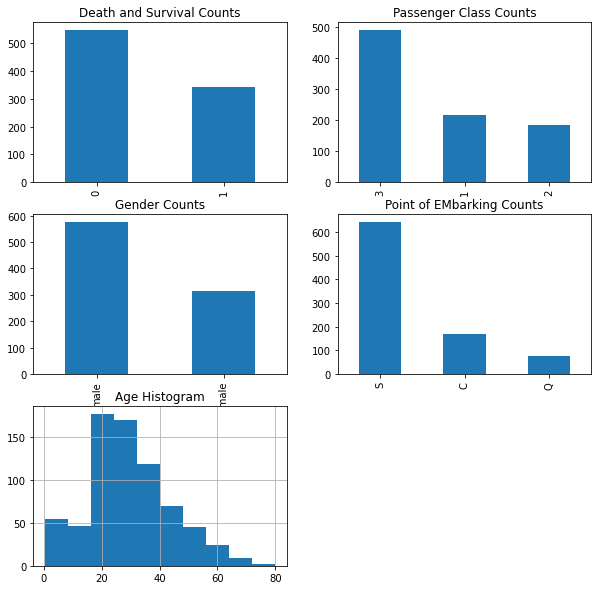

In [9]:
#Plotting features to get a better understanding of each of them:

#Set up grid of plots
fig = plt.figure(figsize=figsize_with_subplots)
fig_dims = (3,2)


#Plot Death and Survival
plt.subplot2grid(fig_dims, (0, 0))
train_data['Survived'].value_counts().plot(kind='bar', 
                                         title='Death and Survival Counts')

#Plot Pclass count
plt.subplot2grid(fig_dims, (0, 1))
train_data['Pclass'].value_counts().plot(kind='bar', 
                                         title='Passenger Class Counts')

#Plot Sex counts
plt.subplot2grid(fig_dims, (1, 0))
train_data['Sex'].value_counts().plot(kind='bar', 
                                         title='Gender Counts')

#Plot Embarked counts
plt.subplot2grid(fig_dims, (1, 1))
train_data['Embarked'].value_counts().plot(kind='bar', 
                                         title='Point of EMbarking Counts')


#Plot a histogram for Age
plt.subplot2grid(fig_dims, (2, 0))
train_data['Age'].hist()
plt.title('Age Histogram')

Next, the impact of the various features on survival will be explored

### Feature One: Embarked
>This feature is missing some vaues which may pose a challenge for our machine learning models. As such we will have to replace the missing values with the median and proceed to determine its impact on 'Survival'

In [10]:
train_data[train_data['Embarked'].isnull()] #Identify the null values in the embarked column

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [11]:
train_data['Embarked'].unique() #Determine the various unique values in the embarked column

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
train_data['Embarked'].mode() #Determine the most occuring unique value in the embarked column and use it to replace the NaN values

0    S
Name: Embarked, dtype: object

In [13]:
def fill_na_embarked(train_data, colname): #a function to replace the NaN values with the mode
    
    return train_data[colname].fillna('S')
    
train_data['Embarked'] = fill_na_embarked(train_data, 'Embarked')

In [14]:
train_data['Embarked'].unique() #check to determine if all NaN values have been replaced

array(['S', 'C', 'Q'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='Embarked'>

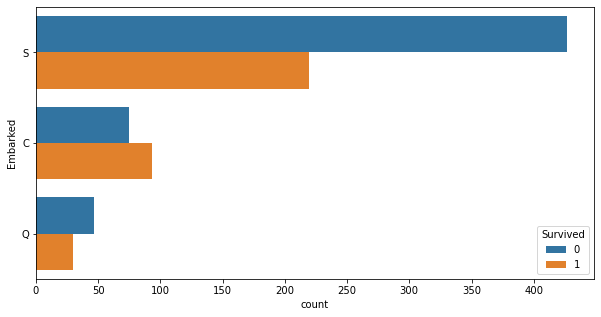

In [15]:
#Creating a bar grapgh for point of embarkement and survival

sns.countplot(data=train_data, y='Embarked', hue='Survived') #plot to visualize survival rates at each point of embarkement

### Feature: Age
> Given the Age column also has a lot of missing values, a range of numbers between the mean and the standard deviation would be generated and randomly spread across the rows with missing values.

In [16]:
#Identifying the mean and SD values

mean = train_data['Age'].mean()
sd = train_data['Age'].std()
print(mean,sd)

29.69911764705882 14.526497332334044


In [17]:
#Input replace null cells with mean in the age column
train_data.Age[np.isnan(train_data.Age)] = np.nanmean(train_data.Age, axis=0)
np.count_nonzero(np.isnan(train_data.Age))

C:\Users\Ebenezer Edusei\AppData\Local\Temp\ipykernel_9448\2274128425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.Age[np.isnan(train_data.Age)] = np.nanmean(train_data.Age, axis=0)


0

In [18]:
train_data.info() #determine if all the NaN values in the Age column have been replaced successfully.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
minimum_age = train_data['Age'].min()
maximum_age = train_data['Age'].max()

print(minimum_age, maximum_age)

0.42 80.0


Text(0, 0.5, 'Count')

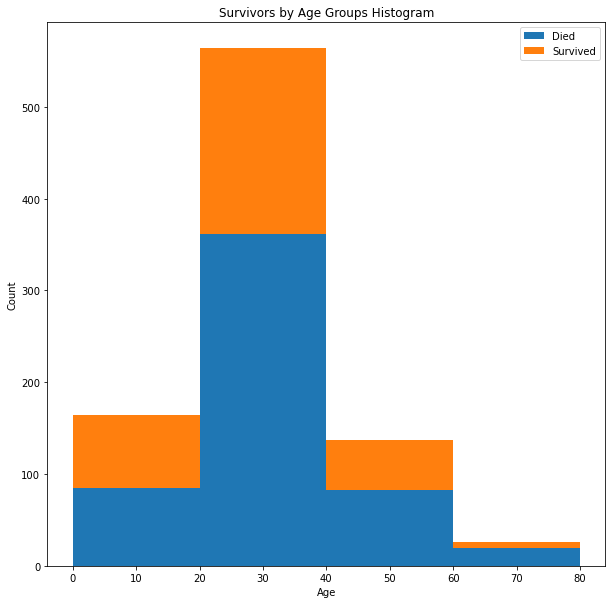

In [20]:
# Set up a grid of plots
fig = plt.figure(figsize=figsize_with_subplots)

# Histogram of AgeFill segmented by Survived
df1 = train_data[train_data['Survived'] == 0]['Age']
df2 = train_data[train_data['Survived'] == 1]['Age']
max_age = max(train_data['Age'])
plt.hist([df1, df2], 
             bins= [0, 20, 40, 60, 80], 
             range=(1, max_age), 
             stacked=True)
plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Age Groups Histogram')
plt.xlabel('Age')
plt.ylabel('Count')

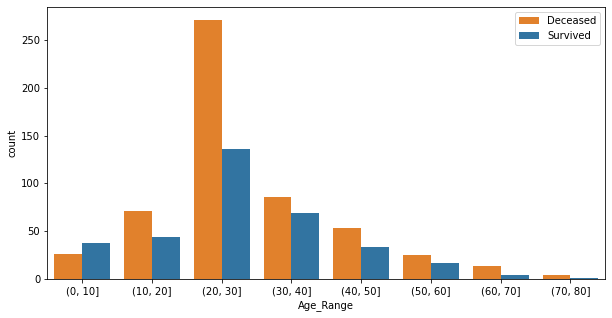

In [21]:
train_data['Age_Range'] = pd.cut(train_data.Age, [0, 10, 20, 30, 40, 50, 60,70,80])
sns.countplot(x = "Age_Range", hue = "Survived", data = train_data, palette=["C1", "C0"]).legend(labels = ["Deceased", "Survived"])

### Feature: Passenger Class
>From the EDA it was realized that there were three passenger classes. The analysis would identify the death and survival rate per class and proceed to visualize it

In [22]:
#Determining the number of people who died/survied per class
pclass_xt = pd.crosstab(train_data['Pclass'], train_data['Survived'])
pclass_xt

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<AxesSubplot:xlabel='count', ylabel='Pclass'>

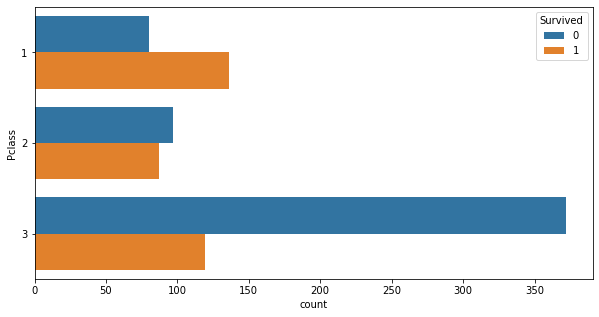

In [23]:
#Creating a bar grapgh for point of embarkement and survival

sns.countplot(data=train_data, y='Pclass', hue='Survived') #plot to visualize survival rates at each point of embarkement

### Feature: Sex
>The analysis would proceed to verify the gender with the highest survival

In [24]:
#Creating a bar grapgh for point of embarkement and survival

sex_surv = pd.crosstab(train_data['Sex'], train_data['Survived'])
sex_surv

Survived,0,1
Sex,,
female,81,233
male,468,109


<AxesSubplot:xlabel='Sex'>

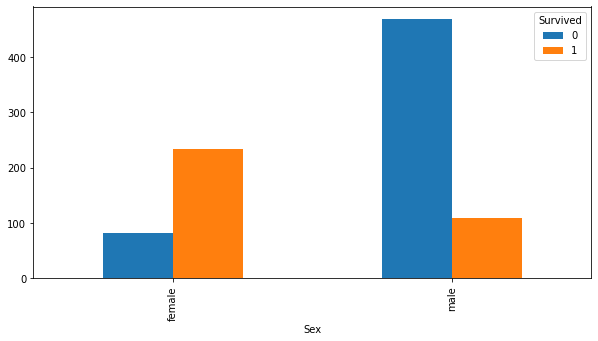

In [25]:
sex_surv.plot(kind='bar') #plotting the survival rate per sex

### Feature: Fare
>The analysis will determine which fare range had the most persons surviving the sinking

In [26]:
min_fare = train_data['Fare'].min()
max_fare = train_data['Fare'].max()

print(min_fare, max_fare)

0.0 512.3292


Text(0, 0.5, 'Count')

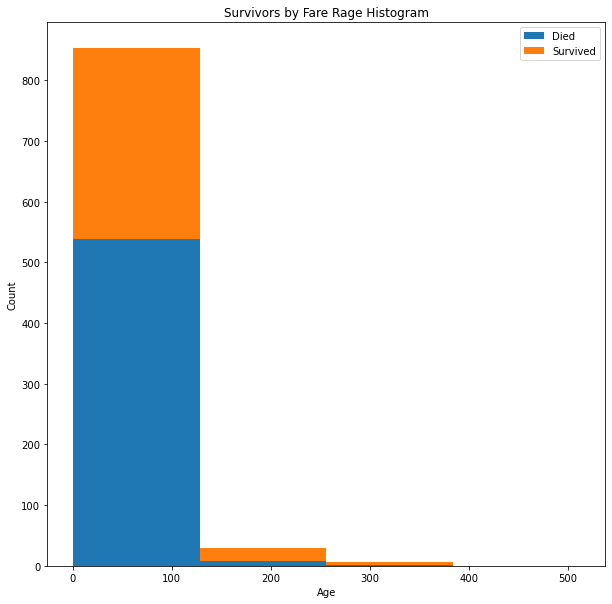

In [27]:
# Set up a grid of plots
fig = plt.figure(figsize=figsize_with_subplots)

# Histogram of AgeFill segmented by Survived
df1 = train_data[train_data['Survived'] == 0]['Fare']
df2 = train_data[train_data['Survived'] == 1]['Fare']
max_fare = max(train_data['Fare'])
plt.hist([df1, df2], 
             bins= [0, 128, 256, 384, 512], 
             range=(1, max_age), 
             stacked=True)
plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Fare Rage Histogram')
plt.xlabel('Age')
plt.ylabel('Count')

In [28]:
train_data['Fare_Category'] = pd.cut(train_data['Fare'], bins=[0,7.90,14.45,31.28,120], labels=['Low','Mid', 'High_Mid','High'])

<AxesSubplot:xlabel='count', ylabel='Fare_Category'>

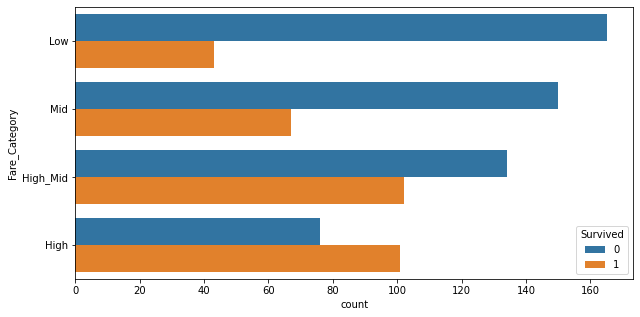

In [29]:
sns.countplot(data=train_data, y='Fare_Category', hue='Survived')

### Feature: Sibsp
>This relates to the maximum number of siblings or spouse that a passenger travelled with on the titanic. The analysis will identify the maximum and minimum number of spouses and proceed to visualize the survival rates.

In [30]:
train_data['SibSp'].describe() # the minimum number is zero whilst the maximum number is 8

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

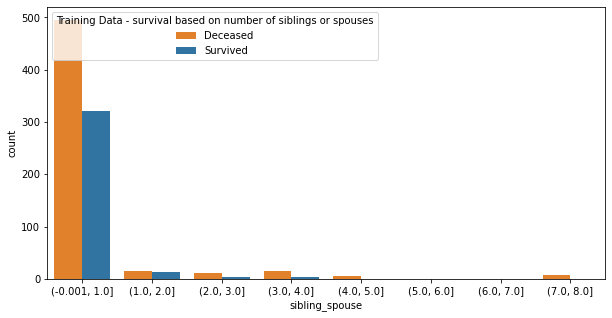

In [31]:
sibspouse = pd.DataFrame()
sibspouse['survived'] = train_data.Survived
sibspouse['sibling_spouse'] = pd.cut(train_data.SibSp, [0, 1, 2, 3, 4, 5, 6,7,8], include_lowest = True)


siblings_and_spouse = sns.countplot(x = "sibling_spouse", hue = "survived", data = sibspouse, palette=["C1", "C0"]).legend(labels = ["Deceased", "Survived"])
siblings_and_spouse.set_title("Training Data - survival based on number of siblings or spouses")

### Feature : Parch

>This consists of the total number of parents or children travelling with a passenger. 

In [32]:
train_data.Parch.describe() #Determining the minimum and Maximum values for this column

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

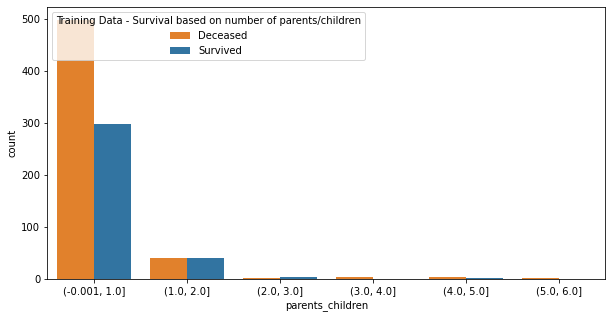

In [33]:
parent_child = pd.DataFrame()
parent_child['survived'] = train_data.Survived
parent_child['parents_children'] = pd.cut(train_data.Parch, [0, 1, 2, 3, 4, 5, 6], include_lowest = True)


P_child = sns.countplot(x = "parents_children", hue = "survived", data = parent_child, palette=["C1", "C0"]).legend(labels = ["Deceased", "Survived"])
P_child.set_title("Training Data - Survival based on number of parents/children")

***Create a new column called 'family' to determine if chances of survival increase when an individual travels with a group or alone***

In [34]:
#Combine the values in the Parch column with the SibSp column to create new column called 'Family'
train_data['Family'] = train_data.Parch + train_data.SibSp

# create a new column names 'Is Alone' and assign a value to it if family is 0
train_data['Is_Alone'] = train_data.Family == 0

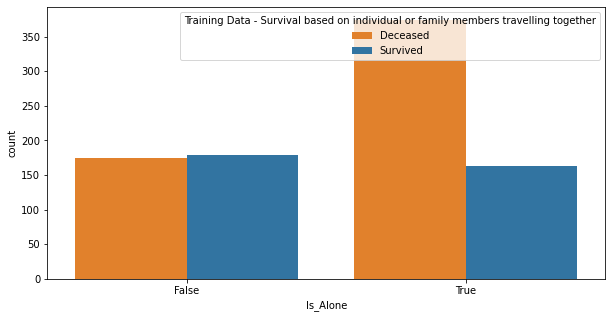

In [35]:
w_family = sns.countplot(x = "Is_Alone", hue = "Survived", data = train_data, palette=["C1", "C0"]).legend(labels = ["Deceased", "Survived"])
w_family.set_title("Training Data - Survival based on individual or family members travelling together")
#sns.countplot(data=train_data, y='Is_Alone', hue='Survived')

### Cleaning the Test Data

In [36]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [37]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [38]:
#med = np.nanmedian(train_data['Fare'])
#test_data['Fare']=test_data['Fare'].fillna(med)
test_data['Fare']=test_data['Fare'].fillna(test_data['Fare'].median()) #replacing the null value in Fare with median value

In [39]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [40]:
mini_fare = test_data['Fare'].min()
maxi_fare = test_data['Fare'].max()

print(min_fare, max_fare)

0.0 512.3292


In [41]:
test_data['Fare_Category'] = pd.cut(test_data['Fare'], bins=[0,7.90,14.45,31.28,120], labels=['Low','Mid', 'High_Mid','High'])

In [42]:
test_data['Fare_Category'].unique()

['Low', 'Mid', 'High_Mid', 'High', NaN]
Categories (4, object): ['Low' < 'Mid' < 'High_Mid' < 'High']

In [43]:
def fill_na_fcategory(test_data, colname): #a function to replace the NaN values with the mode
    
    return test_data[colname].fillna('Low')
    
test_data['Fare_Category'] = fill_na_fcategory(train_data, 'Fare_Category')

In [44]:
test_data['Fare_Category'].unique()

['Low', 'High', 'Mid', 'High_Mid']
Categories (4, object): ['Low' < 'Mid' < 'High_Mid' < 'High']

In [45]:
test_data['Age']=test_data['Age'].fillna(test_data['Age'].mean()) #replacing the null value in Age with mean value

In [46]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    418 non-null    int64   
 1   Pclass         418 non-null    int64   
 2   Name           418 non-null    object  
 3   Sex            418 non-null    object  
 4   Age            418 non-null    float64 
 5   SibSp          418 non-null    int64   
 6   Parch          418 non-null    int64   
 7   Ticket         418 non-null    object  
 8   Fare           418 non-null    float64 
 9   Cabin          91 non-null     object  
 10  Embarked       418 non-null    object  
 11  Fare_Category  418 non-null    category
dtypes: category(1), float64(2), int64(4), object(5)
memory usage: 36.7+ KB


In [47]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Low
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,High
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mid
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,High
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mid


In [48]:
#create a new column that combines the SibSP and Parch columns together
test_data['Family']=test_data.apply(lambda x: x['SibSp']+x['Parch'], axis=1) 

# create a new column names 'Is Alone' and assign a value to it if family is 0
test_data['Is_Alone'] = test_data.Family == 0

In [49]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category,Family,Is_Alone
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Low,0,True
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,High,1,False
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mid,0,True
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,High,0,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mid,2,False


### Feauture Engineering

In [50]:
#Generate informtion on passeger cabin class
train_data['Cabin_class'] = train_data['Cabin'].apply(lambda x: str(x)[0])

pd.pivot_table(train_data, index='Survived', columns='Cabin_class', values='Ticket', aggfunc='count')

Cabin_class,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [51]:
#Create a column in the train dataset to identify if the passanger's ticket is purely numerical
train_data['Num_ticket'] = train_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)


#Create a column in the train dataset to identify the words or letters in the passenger's ticket.
train_data['Letters_ticket'] = train_data.Ticket.apply(lambda x: ''.join(x.split(' ')[-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1])>0 else 0)

In [52]:
#Create a column in the train dataset to identify if the passanger's ticket is purely numerical
test_data['Num_ticket'] = test_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)


#Create a column in the train dataset to identify the words or letters in the passenger's ticket.
test_data['Letters_ticket'] = test_data.Ticket.apply(lambda x: ''.join(x.split(' ')[-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1])>0 else 0)

In [53]:
# Sorting passenger informtion according to titles
train_data['Title'] = train_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

print(train_data['Title'].value_counts())
pd.pivot_table(train_data, index='Survived', columns='Title', values='Ticket', aggfunc='count')

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64


Title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


## Data Preprocessing

<AxesSubplot:>

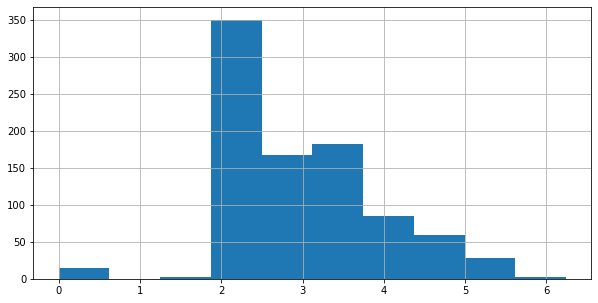

In [54]:
#normalize fare using logarithm
train_data['Norm_fare'] = np.log(train_data['Fare']+1)
train_data['Norm_fare'].hist()

<AxesSubplot:>

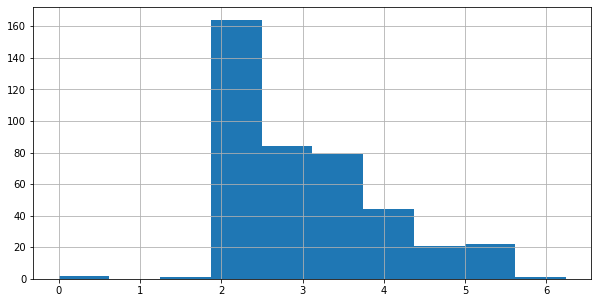

In [55]:
#normalize fare using logarithm
test_data['Norm_fare'] = np.log(test_data['Fare']+1)
test_data['Norm_fare'].hist()

In [56]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Age_Range,Fare_Category,Family,Is_Alone,Cabin_class,Num_ticket,Letters_ticket,Title,Norm_fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,"(20, 30]",Low,1,False,n,0,21171,Mr,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,"(30, 40]",High,1,False,C,0,17599,Mrs,4.280593
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,"(20, 30]",Mid,0,True,n,0,3101282,Miss,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,"(30, 40]",High,1,False,C,1,0,Mrs,3.990834
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,"(30, 40]",Mid,0,True,n,1,0,Mr,2.202765


### Encoding

In [57]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PassengerId     891 non-null    int64   
 1   Survived        891 non-null    int64   
 2   Pclass          891 non-null    int64   
 3   Name            891 non-null    object  
 4   Sex             891 non-null    object  
 5   Age             891 non-null    float64 
 6   SibSp           891 non-null    int64   
 7   Parch           891 non-null    int64   
 8   Ticket          891 non-null    object  
 9   Fare            891 non-null    float64 
 10  Cabin           204 non-null    object  
 11  Embarked        891 non-null    object  
 12  Age_Range       891 non-null    category
 13  Fare_Category   838 non-null    category
 14  Family          891 non-null    int64   
 15  Is_Alone        891 non-null    bool    
 16  Cabin_class     891 non-null    object  
 17  Num_ticket      

In [58]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PassengerId     418 non-null    int64   
 1   Pclass          418 non-null    int64   
 2   Name            418 non-null    object  
 3   Sex             418 non-null    object  
 4   Age             418 non-null    float64 
 5   SibSp           418 non-null    int64   
 6   Parch           418 non-null    int64   
 7   Ticket          418 non-null    object  
 8   Fare            418 non-null    float64 
 9   Cabin           91 non-null     object  
 10  Embarked        418 non-null    object  
 11  Fare_Category   418 non-null    category
 12  Family          418 non-null    int64   
 13  Is_Alone        418 non-null    bool    
 14  Num_ticket      418 non-null    int64   
 15  Letters_ticket  418 non-null    object  
 16  Norm_fare       418 non-null    float64 
dtypes: bool(1), cate

In [59]:
fcol=['Pclass','Sex', 'Age','Embarked','Fare_Category','Is_Alone','Num_ticket', 'Fare']

In [60]:
train_df = train_data[fcol]
test_df = test_data[fcol]

In [61]:
test_df.head()

,Pclass,Sex,Age,Embarked,Fare_Category,Is_Alone,Num_ticket,Fare
0,3,male,34.5,Q,Low,True,1,7.8292
1,3,female,47.0,S,High,False,1,7.0000
2,2,male,62.0,Q,Mid,True,1,9.6875
3,3,male,27.0,S,High,True,1,8.6625
4,3,female,22.0,S,Mid,False,1,12.2875


In [62]:
train_df.head()

,Pclass,Sex,Age,Embarked,Fare_Category,Is_Alone,Num_ticket,Fare
0,3,male,22.0,S,Low,False,0,7.2500
1,1,female,38.0,C,High,False,0,71.2833
2,3,female,26.0,S,Mid,True,0,7.9250
3,1,female,35.0,S,High,False,1,53.1000
4,3,male,35.0,S,Mid,True,1,8.0500


In [63]:
#Converting the values in the Sex column into binary values '0' and '1'
train_df['Sex'] = train_df['Sex'].map({'male':0, 'female':1})

C:\Users\Ebenezer Edusei\AppData\Local\Temp\ipykernel_9448\3233792532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Sex'] = train_df['Sex'].map({'male':0, 'female':1})


In [64]:
train_df.head()

,Pclass,Sex,Age,Embarked,Fare_Category,Is_Alone,Num_ticket,Fare
0,3,0,22.0,S,Low,False,0,7.2500
1,1,1,38.0,C,High,False,0,71.2833
2,3,1,26.0,S,Mid,True,0,7.9250
3,1,1,35.0,S,High,False,1,53.1000
4,3,0,35.0,S,Mid,True,1,8.0500


In [65]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Pclass         891 non-null    int64   
 1   Sex            891 non-null    int64   
 2   Age            891 non-null    float64 
 3   Embarked       891 non-null    object  
 4   Fare_Category  838 non-null    category
 5   Is_Alone       891 non-null    bool    
 6   Num_ticket     891 non-null    int64   
 7   Fare           891 non-null    float64 
dtypes: bool(1), category(1), float64(2), int64(3), object(1)
memory usage: 43.8+ KB


In [66]:
#Converting the values in the Sex column into binary values '0' and '1'
test_df['Sex'] = test_df['Sex'].map({'male':0, 'female':1})

C:\Users\Ebenezer Edusei\AppData\Local\Temp\ipykernel_9448\429077202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Sex'] = test_df['Sex'].map({'male':0, 'female':1})


In [67]:
test_df.head()

,Pclass,Sex,Age,Embarked,Fare_Category,Is_Alone,Num_ticket,Fare
0,3,0,34.5,Q,Low,True,1,7.8292
1,3,1,47.0,S,High,False,1,7.0000
2,2,0,62.0,Q,Mid,True,1,9.6875
3,3,0,27.0,S,High,True,1,8.6625
4,3,1,22.0,S,Mid,False,1,12.2875


In [68]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Pclass         418 non-null    int64   
 1   Sex            418 non-null    int64   
 2   Age            418 non-null    float64 
 3   Embarked       418 non-null    object  
 4   Fare_Category  418 non-null    category
 5   Is_Alone       418 non-null    bool    
 6   Num_ticket     418 non-null    int64   
 7   Fare           418 non-null    float64 
dtypes: bool(1), category(1), float64(2), int64(3), object(1)
memory usage: 20.7+ KB


In [69]:
#Generating dummies(onehot_ecode) for columns in our train dataframe without bianary values.
columnsB=['Pclass','Embarked','Fare_Category', 'Is_Alone']

train_df = pd.get_dummies(train_df, columns=columnsB)

In [70]:
train_df.head()

,Sex,Age,Num_ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Fare_Category_Low,Fare_Category_Mid,Fare_Category_High_Mid,Fare_Category_High,Is_Alone_False,Is_Alone_True
0,0,22.0,0,7.2500,0,0,1,0,0,1,1,0,0,0,1,0
1,1,38.0,0,71.2833,1,0,0,1,0,0,0,0,0,1,1,0
2,1,26.0,0,7.9250,0,0,1,0,0,1,0,1,0,0,0,1
3,1,35.0,1,53.1000,1,0,0,0,0,1,0,0,0,1,1,0
4,0,35.0,1,8.0500,0,0,1,0,0,1,0,1,0,0,0,1


In [71]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sex                     891 non-null    int64  
 1   Age                     891 non-null    float64
 2   Num_ticket              891 non-null    int64  
 3   Fare                    891 non-null    float64
 4   Pclass_1                891 non-null    uint8  
 5   Pclass_2                891 non-null    uint8  
 6   Pclass_3                891 non-null    uint8  
 7   Embarked_C              891 non-null    uint8  
 8   Embarked_Q              891 non-null    uint8  
 9   Embarked_S              891 non-null    uint8  
 10  Fare_Category_Low       891 non-null    uint8  
 11  Fare_Category_Mid       891 non-null    uint8  
 12  Fare_Category_High_Mid  891 non-null    uint8  
 13  Fare_Category_High      891 non-null    uint8  
 14  Is_Alone_False          891 non-null    ui

In [72]:
#Checking for the percentage of missing values in our data set meant for modelling
round(100*(train_df.isnull().sum()/len(train_df.index)), 2)


Sex                       0.0
Age                       0.0
Num_ticket                0.0
Fare                      0.0
Pclass_1                  0.0
Pclass_2                  0.0
Pclass_3                  0.0
Embarked_C                0.0
Embarked_Q                0.0
Embarked_S                0.0
Fare_Category_Low         0.0
Fare_Category_Mid         0.0
Fare_Category_High_Mid    0.0
Fare_Category_High        0.0
Is_Alone_False            0.0
Is_Alone_True             0.0
dtype: float64

In [73]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Pclass         418 non-null    int64   
 1   Sex            418 non-null    int64   
 2   Age            418 non-null    float64 
 3   Embarked       418 non-null    object  
 4   Fare_Category  418 non-null    category
 5   Is_Alone       418 non-null    bool    
 6   Num_ticket     418 non-null    int64   
 7   Fare           418 non-null    float64 
dtypes: bool(1), category(1), float64(2), int64(3), object(1)
memory usage: 20.7+ KB


In [74]:
#Generating dummies(onehot_ecode) for columns in our test dataframe with categorical data.
columnsB=['Pclass','Embarked','Fare_Category', 'Is_Alone']

test_df = pd.get_dummies(test_df, columns=columnsB)

In [75]:
test_df.head()

,Sex,Age,Num_ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Fare_Category_Low,Fare_Category_Mid,Fare_Category_High_Mid,Fare_Category_High,Is_Alone_False,Is_Alone_True
0,0,34.5,1,7.8292,0,0,1,0,1,0,1,0,0,0,0,1
1,1,47.0,1,7.0000,0,0,1,0,0,1,0,0,0,1,1,0
2,0,62.0,1,9.6875,0,1,0,0,1,0,0,1,0,0,0,1
3,0,27.0,1,8.6625,0,0,1,0,0,1,0,0,0,1,0,1
4,1,22.0,1,12.2875,0,0,1,0,0,1,0,1,0,0,1,0


In [76]:
#Checking for the percentage of missing values in our data set meant for modelling
round(100*(test_df.isnull().sum()/len(test_df.index)), 2)


Sex                       0.0
Age                       0.0
Num_ticket                0.0
Fare                      0.0
Pclass_1                  0.0
Pclass_2                  0.0
Pclass_3                  0.0
Embarked_C                0.0
Embarked_Q                0.0
Embarked_S                0.0
Fare_Category_Low         0.0
Fare_Category_Mid         0.0
Fare_Category_High_Mid    0.0
Fare_Category_High        0.0
Is_Alone_False            0.0
Is_Alone_True             0.0
dtype: float64

In [77]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sex                     418 non-null    int64  
 1   Age                     418 non-null    float64
 2   Num_ticket              418 non-null    int64  
 3   Fare                    418 non-null    float64
 4   Pclass_1                418 non-null    uint8  
 5   Pclass_2                418 non-null    uint8  
 6   Pclass_3                418 non-null    uint8  
 7   Embarked_C              418 non-null    uint8  
 8   Embarked_Q              418 non-null    uint8  
 9   Embarked_S              418 non-null    uint8  
 10  Fare_Category_Low       418 non-null    uint8  
 11  Fare_Category_Mid       418 non-null    uint8  
 12  Fare_Category_High_Mid  418 non-null    uint8  
 13  Fare_Category_High      418 non-null    uint8  
 14  Is_Alone_False          418 non-null    ui

In [78]:
# Determining the XFeatures and YLabel
Xfeatures = train_df #train_data.drop(["Survived"], axis=1)
ylabels = train_data['Survived']

In [79]:
#split the Dataset
from sklearn.model_selection import train_test_split
x_train,x_test,ytrain,y_test = train_test_split(Xfeatures, ylabels, test_size=.2, random_state=42)

<AxesSubplot:>

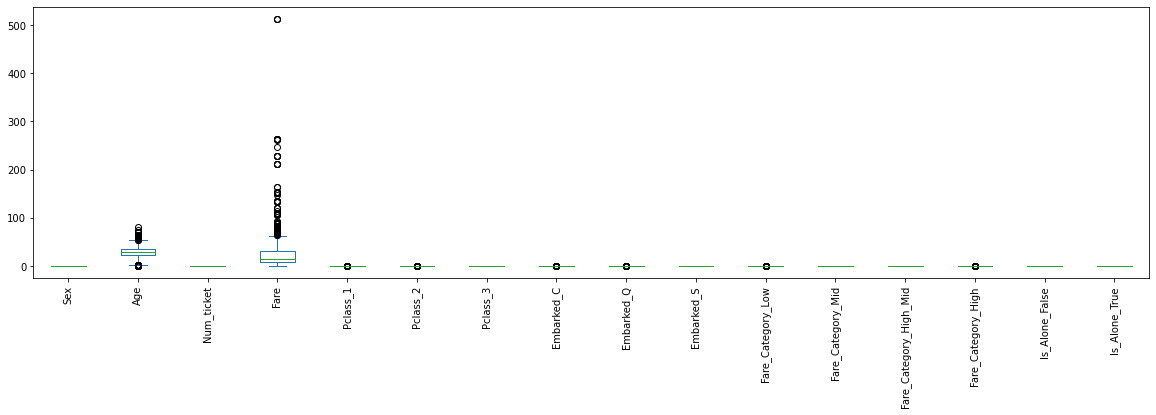

In [80]:
x_train.plot.box(figsize=(20,5), rot=90)

<AxesSubplot:>

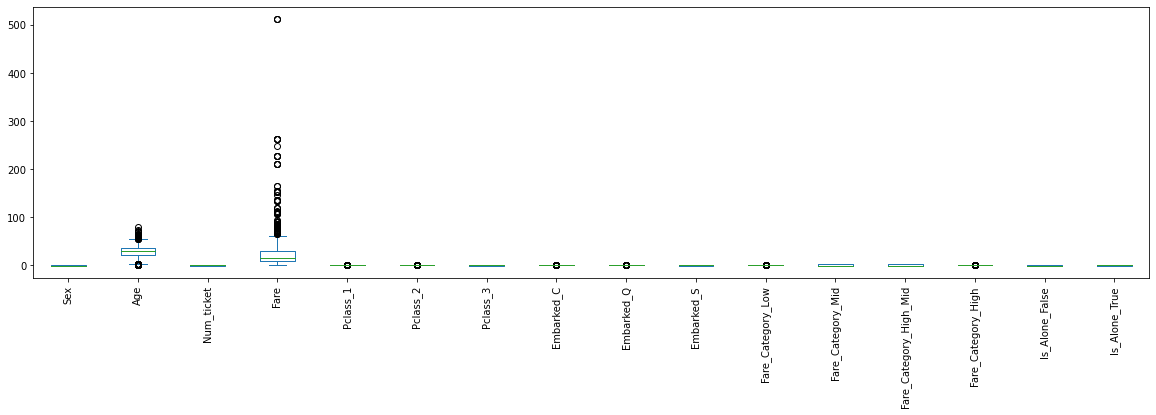

In [81]:
#standadizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train[["Sex", "Num_ticket", "Pclass_3", "Embarked_S", "Fare_Category_Mid", "Fare_Category_High_Mid", "Is_Alone_False", "Is_Alone_True"]] = scaler.fit_transform(x_train[["Sex", "Num_ticket", "Pclass_3", "Embarked_S", "Fare_Category_Mid", "Fare_Category_High_Mid", "Is_Alone_False", "Is_Alone_True"]])
x_test[["Sex", "Num_ticket", "Pclass_3", "Embarked_S", "Fare_Category_Mid", "Fare_Category_High_Mid", "Is_Alone_False", "Is_Alone_True"]] = scaler.fit_transform(x_test[["Sex", "Num_ticket", "Pclass_3", "Embarked_S", "Fare_Category_Mid", "Fare_Category_High_Mid", "Is_Alone_False", "Is_Alone_True"]])

#plot scales x_train data
pd.DataFrame(x_train, columns=x_train.columns).plot.box(figsize=(20,5), rot=90)

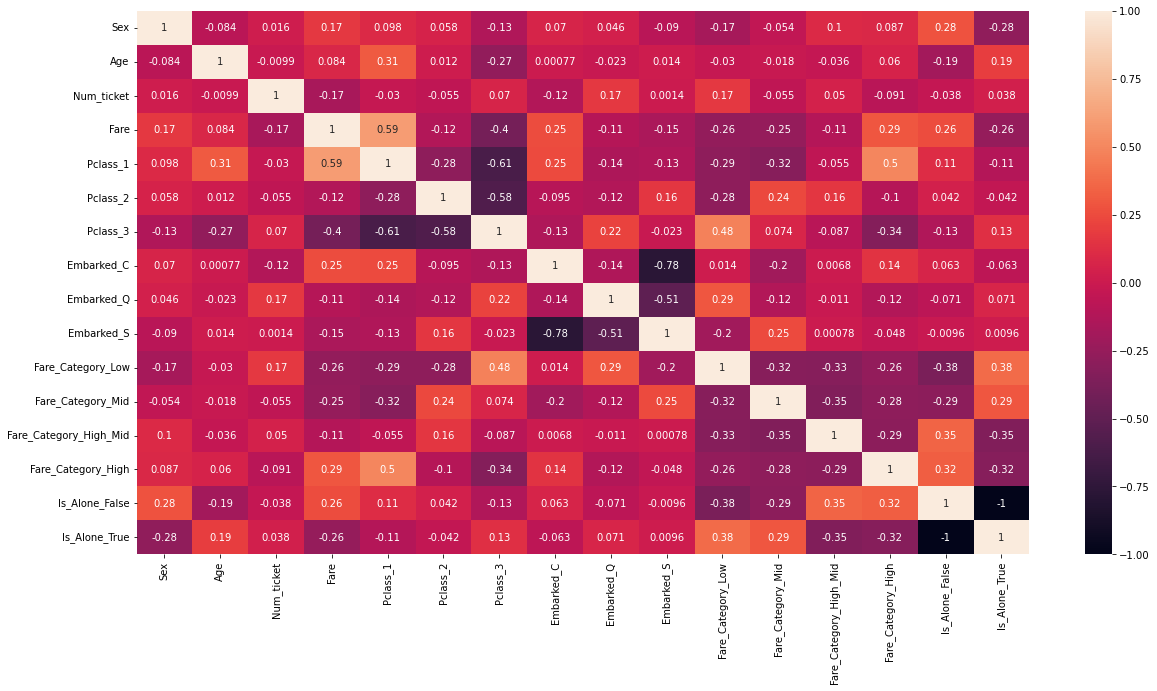

In [82]:
plt.figure(figsize = (20,10))
sns.heatmap(x_train.corr(), annot = True)
plt.show()

## Model Building

***Model Evaluation***
>create a funtion that evaluates the model for its accuracy score, precision score, recall score, f1 score and cohen kappa score

In [83]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

### Machine Learning Model One - LogisticRegression

In [84]:
lr_model = LogisticRegression()
lr_model.fit(x_train, ytrain)

C:\Users\Ebenezer Edusei\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [85]:
# Evaluate Model
lrm_evl = evaluate_model(lr_model, x_test, y_test)

In [86]:
# Print result
print('Accuracy:', lrm_evl['acc'])
print('Precision:', lrm_evl['prec'])
print('Recall:', lrm_evl['rec'])
print('F1 Score:', lrm_evl['f1'])
print('Cohens Kappa Score:', lrm_evl['kappa'])
print('Area Under Curve:', lrm_evl['auc'])
print('Confusion Matrix:\n', lrm_evl['cm'])

Accuracy: 0.8156424581005587
Precision: 0.8153846153846154
Recall: 0.7162162162162162
F1 Score: 0.762589928057554
Cohens Kappa Score: 0.6129349321800668
Area Under Curve: 0.8777348777348777
Confusion Matrix:
 [[93 12]
 [21 53]]


### Machine Learning Model Two -DecisionTreeClassifier

In [87]:
# Building Decision Tree model 
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train, ytrain)

DecisionTreeClassifier(random_state=0)

In [88]:
# Evaluate Model
dt_evl = evaluate_model(dt, x_test, y_test)

In [89]:
# Print result
print('Accuracy:', dt_evl['acc'])
print('Precision:', dt_evl['prec'])
print('Recall:', dt_evl['rec'])
print('F1 Score:', dt_evl['f1'])
print('Cohens Kappa Score:', dt_evl['kappa'])
print('Area Under Curve:', dt_evl['auc'])
print('Confusion Matrix:\n', dt_evl['cm'])

Accuracy: 0.7653631284916201
Precision: 0.7285714285714285
Recall: 0.6891891891891891
F1 Score: 0.7083333333333334
Cohens Kappa Score: 0.5123248572911261
Area Under Curve: 0.7620978120978122
Confusion Matrix:
 [[86 19]
 [23 51]]


### Machine Learning Model Three - RandomForestClassifier

In [90]:
# Building Random Forest model 
rfm = RandomForestClassifier(random_state=0)
rfm.fit(x_train, ytrain)

RandomForestClassifier(random_state=0)

In [91]:
#Evaluate Random Forest Model
rfm_evl = evaluate_model(rfm, x_test, y_test)

In [92]:
# Print result
print('Accuracy:', rfm_evl['acc'])
print('Precision:', rfm_evl['prec'])
print('Recall:', rfm_evl['rec'])
print('F1 Score:', rfm_evl['f1'])
print('Cohens Kappa Score:', rfm_evl['kappa'])
print('Area Under Curve:', rfm_evl['auc'])
print('Confusion Matrix:\n', rfm_evl['cm'])

Accuracy: 0.8100558659217877
Precision: 0.7777777777777778
Recall: 0.7567567567567568
F1 Score: 0.7671232876712328
Cohens Kappa Score: 0.6067967437653443
Area Under Curve: 0.8820463320463322
Confusion Matrix:
 [[89 16]
 [18 56]]


# Model Comparison

> Having built all our models, they will all be compared with each other to determine their performance using two different charts.
>>the first chart will be a grouped bar chart displaying their accuracy, precision, recall, f1, and kappa score.\
>>the second would be a group line chart depicting thier AUC of all the model

***grouped bar chart with accuracy, precision, recall, f1 and lappa scores for each model***

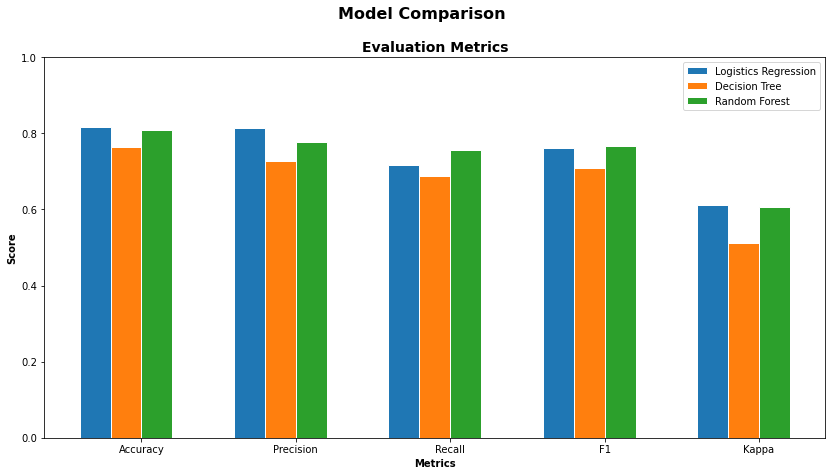

In [93]:
# Intitialize figure with plot
fig, ax1 = plt.subplots()
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
lrm_score = [lrm_evl['acc'], lrm_evl['prec'], lrm_evl['rec'], lrm_evl['f1'], lrm_evl['kappa']]
dt_score = [dt_evl['acc'], dt_evl['prec'], dt_evl['rec'], dt_evl['f1'], dt_evl['kappa']]
rfm_score = [rfm_evl['acc'], rfm_evl['prec'], rfm_evl['rec'], rfm_evl['f1'], rfm_evl['kappa']]


## Set position of bar on X axis
r1 = np.arange(len(dt_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
#r4 = [x + barWidth for x in r3]
#r5 = [x + barWidth for x in r4]

## Make the plot
ax1.bar(r1, lrm_score, width=barWidth, edgecolor='white', label='Logistics Regression')
ax1.bar(r2, dt_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r3, rfm_score, width=barWidth, edgecolor='white', label='Random Forest')
#ax1.bar(r4, nbm_score, width=barWidth, edgecolor='white', label='Naive Bayes')
#ax1.bar(r5, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(lrm_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

***Grouped Line chart with the AUC of all Models***

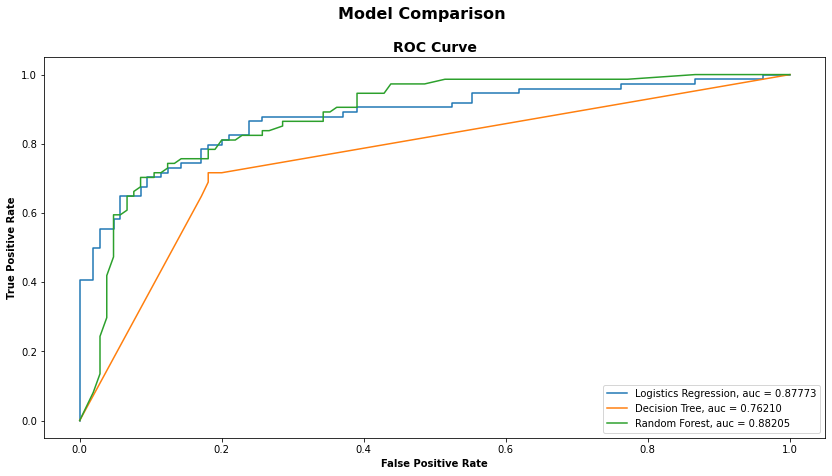

In [94]:
# Initialize Second plot
fig, ax2 = plt.subplots()
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

## Comparing ROC Curve
ax2.plot(lrm_evl['fpr'], lrm_evl['tpr'], label='Logistics Regression, auc = {:0.5f}'.format(lrm_evl['auc']))
ax2.plot(dt_evl['fpr'], dt_evl['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dt_evl['auc']))
ax2.plot(rfm_evl['fpr'], rfm_evl['tpr'], label='Random Forest, auc = {:0.5f}'.format(rfm_evl['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

***Inference:***
>from these charts, it is evident that the Random Forest Model is the most appropriate model for prediction\
    given it excels in 4 out of the 6 criteria. It is therefore assumed that the Random Forest Model would solve our problem and help with the prediction.

### Hyper Parameter Tuning

***The Raandom Forest Model will be optimised by tuning the hyper parameters available using the scikit-learn library.*** 

***_Steps:_***
1. Identify the optimal parameters
2. Compare the new model with our baseline model to evaluate it

In [95]:
# Creating the hyperparameter grid
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
 
# Instantiating logistic regression classifier
rfc=RandomForestClassifier(random_state=42)
 
# Instantiating the GridSearchCV object
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, ytrain)

C:\Users\Ebenezer Edusei\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Ebenezer Edusei\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Ebenezer Edusei\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it 

C:\Users\Ebenezer Edusei\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Ebenezer Edusei\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Ebenezer Edusei\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it 

C:\Users\Ebenezer Edusei\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Ebenezer Edusei\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Ebenezer Edusei\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it 

C:\Users\Ebenezer Edusei\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Ebenezer Edusei\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Ebenezer Edusei\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it 

C:\Users\Ebenezer Edusei\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Ebenezer Edusei\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Ebenezer Edusei\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it 

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [96]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 500}

In [97]:
rfc1 = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

In [98]:
rfc1.fit(x_train, ytrain)

C:\Users\Ebenezer Edusei\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=8, max_features='auto', n_estimators=200,
                       random_state=42)

In [99]:
pred = rfc1.predict(x_test)

In [100]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.8435754189944135


In [101]:
op_rf=rfc1.predict(test_df)

In [102]:
op=pd.DataFrame(test_data['PassengerId'])
op['Survived']=op_rf

In [103]:
op.to_csv("op_rf.csv", index=False)

### Selecting the Top 10 variables for our Random Forest Model
>Here, the top 10 significant variables to our model would be selected and used in developing our RF model

In [104]:
rfe = RFE(rfc1)

rfe = rfe.fit(x_train, ytrain)

C:\Users\Ebenezer Edusei\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Ebenezer Edusei\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Ebenezer Edusei\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it 

In [105]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('Sex', True, 1),
 ('Age', True, 1),
 ('Num_ticket', False, 2),
 ('Fare', True, 1),
 ('Pclass_1', True, 1),
 ('Pclass_2', True, 1),
 ('Pclass_3', True, 1),
 ('Embarked_C', False, 4),
 ('Embarked_Q', False, 9),
 ('Embarked_S', True, 1),
 ('Fare_Category_Low', False, 8),
 ('Fare_Category_Mid', False, 7),
 ('Fare_Category_High_Mid', False, 3),
 ('Fare_Category_High', False, 5),
 ('Is_Alone_False', False, 6),
 ('Is_Alone_True', True, 1)]

from this output, it is clear that the most significant variables are those ascribed with the values "True, 1". Thus further development of our model should be based on these. Also, the other variables can be added based on their ascribed "false numbers"

In [106]:
#Building model with top 7 variables
import statsmodels.api as sm
col = x_train.columns[rfe.support_]

In [107]:
x_train = x_train[col]

x_test  = x_test[col]

x_test.head()

,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_S,Is_Alone_True
709,-0.792006,29.699118,15.2458,0,0,0.961629,-1.408309,-1.233340
439,-0.792006,31.000000,10.5000,0,1,-1.039902,0.710072,0.810807
840,-0.792006,20.000000,7.9250,0,0,0.961629,0.710072,0.810807
720,1.262617,6.000000,33.0000,0,1,-1.039902,0.710072,-1.233340
39,1.262617,14.000000,11.2417,0,0,0.961629,-1.408309,-1.233340


In [108]:
X_train = sm.add_constant(x_train[col])
rfc_model = sm.GLM(ytrain, X_train, family=sm.families.Binomial())
res = rfc_model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      704
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -323.43
Date:                Tue, 14 Feb 2023   Deviance:                       646.86
Time:                        22:39:57   Pearson chi2:                     740.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3403
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0528      0.247     -0.214      0.831      -0.537       0.431
Sex               1.2294      0.102     12.023      0.000       1.029       1.430
Age              -0.0257      0.008     -3.075      0.002      -0.042      -0.009
Fare              0.0012      0.002      0.511      0.609      -0.003       0.006
Pclass_1          0.4801      0.191      2.519      0.012       0.107       0.854
Pclass_2         -0.1313      0.151     -0.870      0.384      -0.427       0.164
Pclass_3         -0.7493      0.100     -7.525      0.000      -0.944      -0.554
Embarked_S       -0.2520      0.099     -2.540      0.011      -0.447      -0.058
Is_Alone_True     0.0567      0.106      0.535      0.593      -0.151       0.265
=================================================================================
"""

In [109]:
rfc2 = RandomForestClassifier(random_state=0)
rfc2.fit(x_train, ytrain)

# Evaluate Model
rfc2_evl = evaluate_model(rfc2, x_test, y_test)

In [110]:
# Print result
print('Accuracy:', rfc2_evl['acc'])
print('Precision:', rfc2_evl['prec'])
print('Recall:', rfc2_evl['rec'])
print('F1 Score:', rfc2_evl['f1'])
print('Cohens Kappa Score:', rfc2_evl['kappa'])
print('Area Under Curve:', rfc2_evl['auc'])
print('Confusion Matrix:\n', rfc2_evl['cm'])

Accuracy: 0.7988826815642458
Precision: 0.7567567567567568
Recall: 0.7567567567567568
F1 Score: 0.7567567567567567
Cohens Kappa Score: 0.5853281853281853
Area Under Curve: 0.8815315315315315
Confusion Matrix:
 [[87 18]
 [18 56]]


In [111]:
'''#Adding the survival prediction to the Test dataset
a = test_data.merge(op, how='left', on=['PassengerId'])'''

"#Adding the survival prediction to the Test dataset\na = test_data.merge(op, how='left', on=['PassengerId'])"

In [112]:
rfc1

RandomForestClassifier(max_depth=8, max_features='auto', n_estimators=200,
                       random_state=42)

In [113]:
rfc2

RandomForestClassifier(random_state=0)

In [114]:
#Make a orediction wih the models
example_1 = x_test.iloc[8]
actual_1 = y_test.iloc[8]

In [115]:
actual_1 #Expected or Actual Prediction

1

In [116]:
op_rf=rfc1.predict(test_df)

In [117]:
ex_1 = 

SyntaxError: invalid syntax (2959444029.py, line 1)

In [118]:
#prediction with the LR
print(rfc2.predict([example_1]))
print(rfc2.predict_proba([example_1])) #probability of accurately predicting the actual

[1]
[[0.2425 0.7575]]


C:\Users\Ebenezer Edusei\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Ebenezer Edusei\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Saving Prediction

In [119]:
#Adding the survival prediction to the Test dataset
Prediction = test_data.merge(op, how='left', on=['PassengerId'])

In [120]:
Prediction.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Category,Family,Is_Alone,Num_ticket,Letters_ticket,Norm_fare,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Low,0,True,1,0,2.178064,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,High,1,False,1,0,2.079442,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mid,0,True,1,0,2.369075,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,High,0,True,1,0,2.268252,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mid,2,False,1,0,2.586824,1


In [122]:
#Save new dataframe into csv file
Prediction.to_csv('Passenger_survival_prediction.csv', index=False)

## Saving Model

In [123]:
#import the pickle library
import pickle

In [124]:
#Create a file containing our trained model.
filename = "trained_rfc_model.sav"
pickle.dump(rfc2, open(filename, "wb"))

In [125]:
# load the saved model
loaded_model = pickle.load(open('trained_rfc_model.sav', 'rb'))

In [126]:
#create a function with our loaded model
input_data = (1, 32, 20, 1, 0, 0, 1, 0)

#change the input data into a numpy array
input_data_nparray = np.asarray(input_data)

#reshape the array given we are predicting for one instance
input_data_reshape = input_data_nparray.reshape(1, -1)

prediction = loaded_model.predict(input_data_reshape)
print(prediction)

if (prediction[0]==0):
    print('Passenger will not die')
else:
    print('passeger will die gruesomely')

[1]
passeger will die gruesomely


C:\Users\Ebenezer Edusei\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [129]:
dump(rfc2, 'model.joblib')

['model.joblib']

In [128]:
from joblib import dump

# FastAPI